In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.QMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.QMNIST(root='./data', train=False, download=True, transform=transform)


100%|██████████| 9704059/9704059 [00:00<00:00, 127008086.60it/s]

Extracting ./data/QMNIST/raw/qmnist-train-images-idx3-ubyte.gz to ./data/QMNIST/raw


100%|██████████| 463024/463024 [00:00<00:00, 49941199.25it/s]

Extracting ./data/QMNIST/raw/qmnist-train-labels-idx2-int.gz to ./data/QMNIST/raw


100%|██████████| 9742279/9742279 [00:00<00:00, 127961518.86it/s]

Extracting ./data/QMNIST/raw/qmnist-test-images-idx3-ubyte.gz to ./data/QMNIST/raw


100%|██████████| 526800/526800 [00:00<00:00, 71790218.57it/s]

Extracting ./data/QMNIST/raw/qmnist-test-labels-idx2-int.gz to ./data/QMNIST/raw


In [ ]:

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

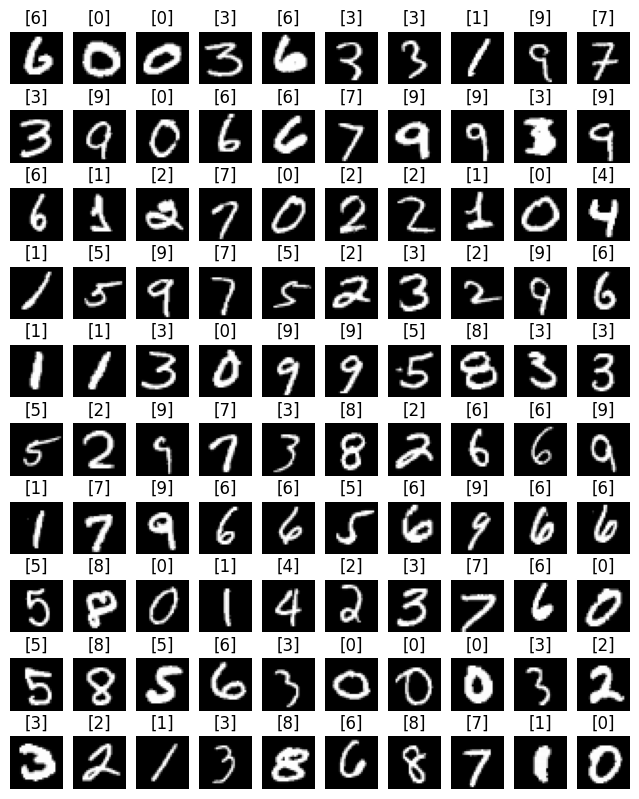

In [ ]:
figure = plt.figure(figsize=(8, 10))
cols, rows = 10, 10
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title([label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [ ]:
# neural network
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = MLP()

In [ ]:
#loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train model
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')

Epoch 1, Batch 100, Loss: 0.9988183027505875
Epoch 1, Batch 200, Loss: 0.45813717469573023
Epoch 1, Batch 300, Loss: 0.36373684599995615
Epoch 1, Batch 400, Loss: 0.3335340431332588
Epoch 1, Batch 500, Loss: 0.3004183006286621
Epoch 1, Batch 600, Loss: 0.31756368070840835
Epoch 1, Batch 700, Loss: 0.2811945004761219
Epoch 1, Batch 800, Loss: 0.2445469505339861
Epoch 1, Batch 900, Loss: 0.2512594051286578
Epoch 2, Batch 100, Loss: 0.20982209887355566
Epoch 2, Batch 200, Loss: 0.2173678847402334
Epoch 2, Batch 300, Loss: 0.20425254989415406
Epoch 2, Batch 400, Loss: 0.1845102183520794
Epoch 2, Batch 500, Loss: 0.16292474295943976
Epoch 2, Batch 600, Loss: 0.1828798545524478
Epoch 2, Batch 700, Loss: 0.16503096297383307
Epoch 2, Batch 800, Loss: 0.16467800039798022
Epoch 2, Batch 900, Loss: 0.16412549633532764
Epoch 3, Batch 100, Loss: 0.14468482330441476
Epoch 3, Batch 200, Loss: 0.13709942519664764
Epoch 3, Batch 300, Loss: 0.1283456511143595
Epoch 3, Batch 400, Loss: 0.1308146592602133

In [ ]:
# Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()


print(f'Accuracy on test set: { correct / total}%')

Accuracy on test set: 0.9613%


In [ ]:
# Evaluate the model and store predictions
model.eval()
predictions = []
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        predictions.extend(predicted.numpy())  # Store predictions
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(total)
print(correct)

60000
57678


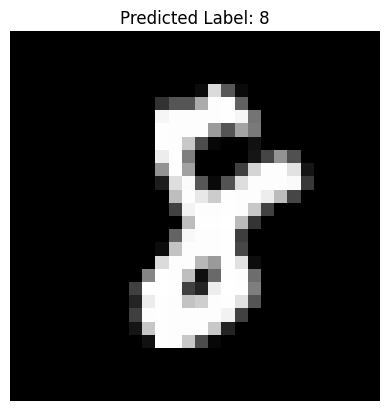

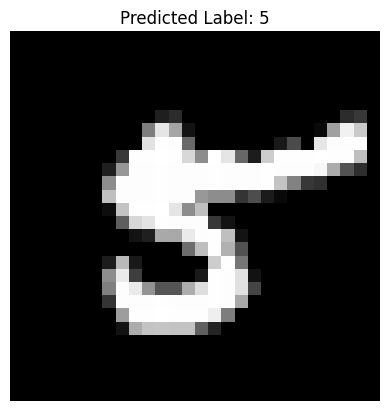

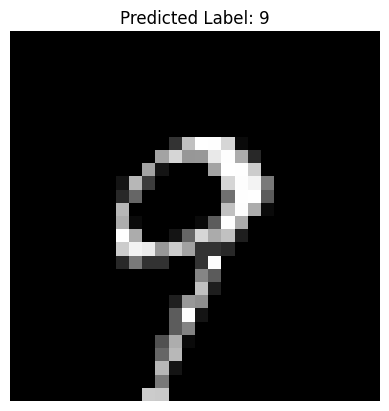

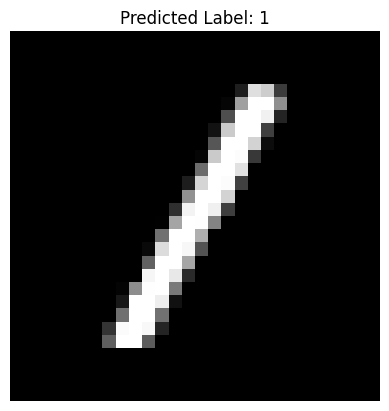

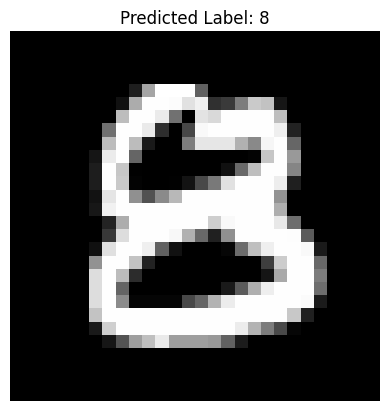

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def imshow(img, label):
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title('Predicted Label: {}'.format(label))
    plt.axis('off')
    plt.show()


for i in range(5):
    idx = np.random.randint(len(test_dataset))
    img, label = test_dataset[idx]
    output = model(img.unsqueeze(0))
    _, predicted = torch.max(output.data, 1)

    imshow(img, predicted.item())


HYPOTHETHIS TESTING (Increase the current number of nodes in the layer to 256)

Epoch 1, Batch 100, Loss: 0.8002018728852272
Epoch 1, Batch 200, Loss: 0.3952107684314251
Epoch 1, Batch 300, Loss: 0.31931288436055183
Epoch 1, Batch 400, Loss: 0.26075190857052805
Epoch 1, Batch 500, Loss: 0.26729598008096217
Epoch 1, Batch 600, Loss: 0.21913364134728908
Epoch 1, Batch 700, Loss: 0.21925347462296485
Epoch 1, Batch 800, Loss: 0.21027554128319026
Epoch 1, Batch 900, Loss: 0.17741445455700158
Epoch 2, Batch 100, Loss: 0.15196245549246667
Epoch 2, Batch 200, Loss: 0.15209198033437132
Epoch 2, Batch 300, Loss: 0.1457829143665731
Epoch 2, Batch 400, Loss: 0.14782227493822575
Epoch 2, Batch 500, Loss: 0.15354720409959555
Epoch 2, Batch 600, Loss: 0.13687447804957628
Epoch 2, Batch 700, Loss: 0.14746225118637085
Epoch 2, Batch 800, Loss: 0.14223921297118067
Epoch 2, Batch 900, Loss: 0.14319326719269157
Epoch 3, Batch 100, Loss: 0.10393440784420818
Epoch 3, Batch 200, Loss: 0.10519048481248319
Epoch 3, Batch 300, Loss: 0.12611900168471038
Epoch 3, Batch 400, Loss: 0.101084130

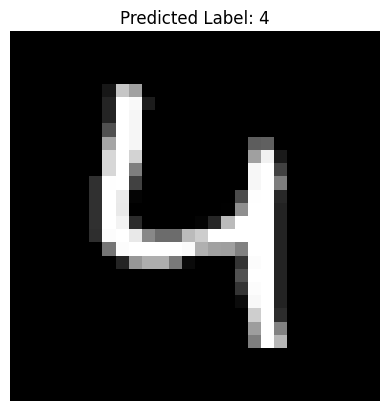

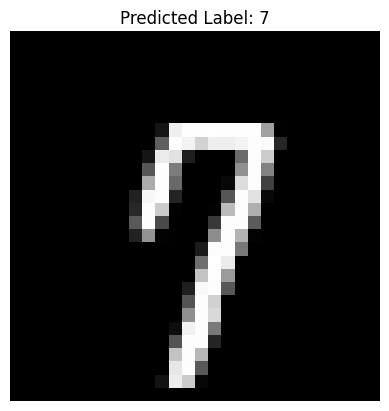

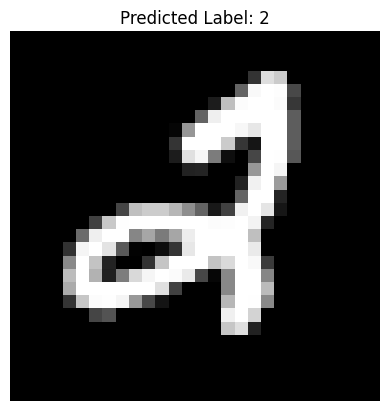

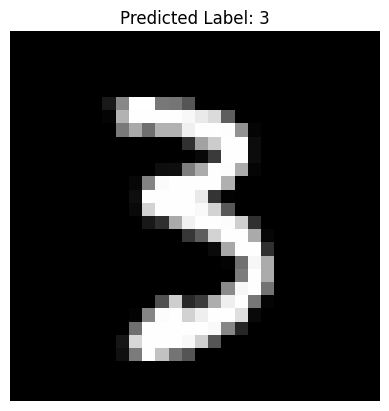

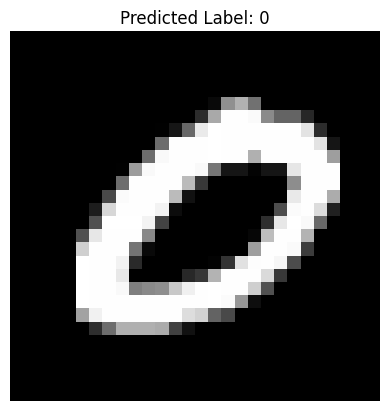

In [ ]:

class MLP_1(nn.Module):
    def __init__(self):
        super(MLP_1, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


model_2 = MLP_1()



criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_2.parameters(), lr=0.001)


num_epochs = 5
for epoch in range(num_epochs):
    model_2.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model_2(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')



model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model_2(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()


print(f'Accuracy on test set: { correct / total}%')

model.eval()
predictions = []
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model_2(images)
        _, predicted = torch.max(outputs.data, 1)
        predictions.extend(predicted.numpy())
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(total)
print(correct)



import matplotlib.pyplot as plt
import numpy as np


def imshow(img, label):
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title('Predicted Label: {}'.format(label))
    plt.axis('off')
    plt.show()


for i in range(5):
    idx = np.random.randint(len(test_dataset))
    img, label = test_dataset[idx]
    output = model(img.unsqueeze(0))
    _, predicted = torch.max(output.data, 1)

    imshow(img, predicted.item())



i) Changing Optimizers - RMSprop - 0.8862166666666667% (Reduced the Accuracy)

Epoch 1, Batch 100, Loss: 2.848110975623131
Epoch 1, Batch 200, Loss: 0.9169685781002045
Epoch 1, Batch 300, Loss: 0.6643785291910171
Epoch 1, Batch 400, Loss: 0.5643455328047275
Epoch 1, Batch 500, Loss: 0.5239639447629452
Epoch 1, Batch 600, Loss: 0.5082365007698536
Epoch 1, Batch 700, Loss: 0.4715547512471676
Epoch 1, Batch 800, Loss: 0.4848550300300121
Epoch 1, Batch 900, Loss: 0.4732456621527672
Epoch 2, Batch 100, Loss: 0.41154583021998403
Epoch 2, Batch 200, Loss: 0.4831056036055088
Epoch 2, Batch 300, Loss: 0.4232149465382099
Epoch 2, Batch 400, Loss: 0.40775645673274996
Epoch 2, Batch 500, Loss: 0.39713800117373466
Epoch 2, Batch 600, Loss: 0.3774599629640579
Epoch 2, Batch 700, Loss: 0.39442863665521144
Epoch 2, Batch 800, Loss: 0.39245003297924996
Epoch 2, Batch 900, Loss: 0.37668007239699364
Epoch 3, Batch 100, Loss: 0.3706324188411236
Epoch 3, Batch 200, Loss: 0.3959432685375214
Epoch 3, Batch 300, Loss: 0.3542301871627569
Epoch 3, Batch 400, Loss: 0.3807459553331137
Epoch

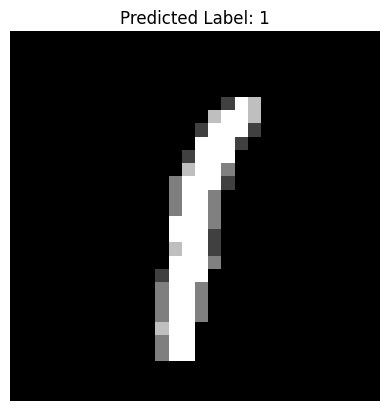

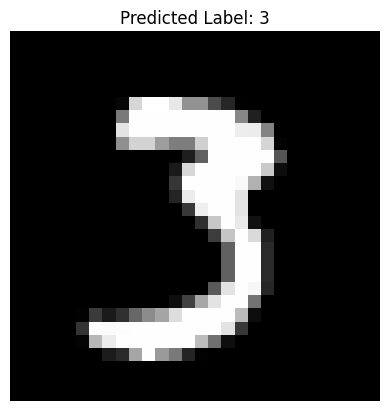

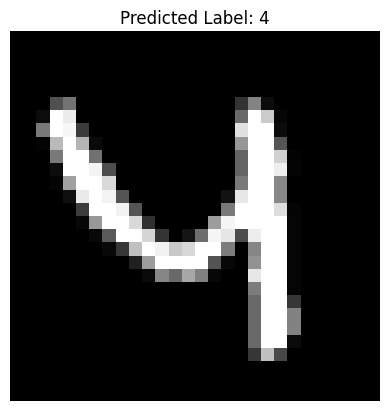

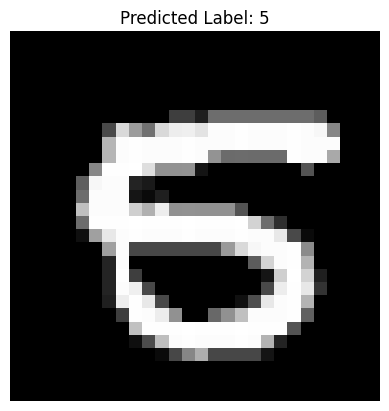

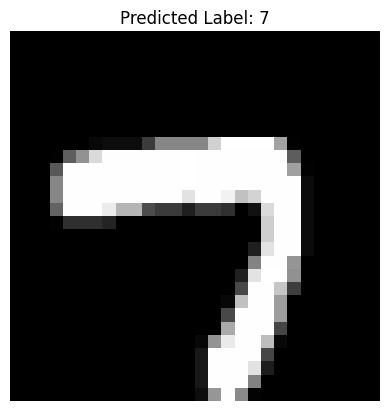

In [ ]:

class MLP_1(nn.Module):
    def __init__(self):
        super(MLP_1, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


model_2 = MLP_1()


criterion = nn.CrossEntropyLoss()
optimizer = optim.RMSprop(model_2.parameters(), lr=0.001, momentum=0.9)

num_epochs = 10
for epoch in range(num_epochs):
    model_2.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model_2(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')



model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model_2(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()


print(f'Accuracy on test set: { correct / total}%')



model.eval()
predictions = []
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model_2(images)
        _, predicted = torch.max(outputs.data, 1)
        predictions.extend(predicted.numpy())
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(total)
print(correct)



import matplotlib.pyplot as plt
import numpy as np

def imshow(img, label):
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title('Predicted Label: {}'.format(label))
    plt.axis('off')
    plt.show()

for i in range(5):
    idx = np.random.randint(len(test_dataset))
    img, label = test_dataset[idx]

    output = model(img.unsqueeze(0))
    _, predicted = torch.max(output.data, 1)

    imshow(img, predicted.item())



ii) Changing Optimizers - SGD with Momemtum - 0.94715% (Reduced the Accuracy)

Epoch 1, Batch 100, Loss: 2.2194926261901857
Epoch 1, Batch 200, Loss: 1.8895894014835357
Epoch 1, Batch 300, Loss: 1.345816332101822
Epoch 1, Batch 400, Loss: 0.9210663896799087
Epoch 1, Batch 500, Loss: 0.6909817191958427
Epoch 1, Batch 600, Loss: 0.5741458663344383
Epoch 1, Batch 700, Loss: 0.5218354126811028
Epoch 1, Batch 800, Loss: 0.4836889788508415
Epoch 1, Batch 900, Loss: 0.4503471337258816
Epoch 2, Batch 100, Loss: 0.42281526148319243
Epoch 2, Batch 200, Loss: 0.4005436244606972
Epoch 2, Batch 300, Loss: 0.3923481723666191
Epoch 2, Batch 400, Loss: 0.37384534552693366
Epoch 2, Batch 500, Loss: 0.3711607028543949
Epoch 2, Batch 600, Loss: 0.3522626683115959
Epoch 2, Batch 700, Loss: 0.3421544878184795
Epoch 2, Batch 800, Loss: 0.3289996676146984
Epoch 2, Batch 900, Loss: 0.33373991563916205
Epoch 3, Batch 100, Loss: 0.3157227476686239
Epoch 3, Batch 200, Loss: 0.33213800892233847
Epoch 3, Batch 300, Loss: 0.3175805924832821
Epoch 3, Batch 400, Loss: 0.3324880769103766
Epoch 3

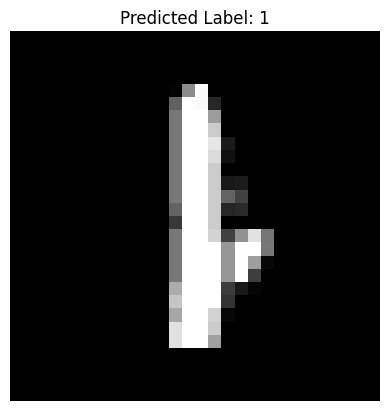

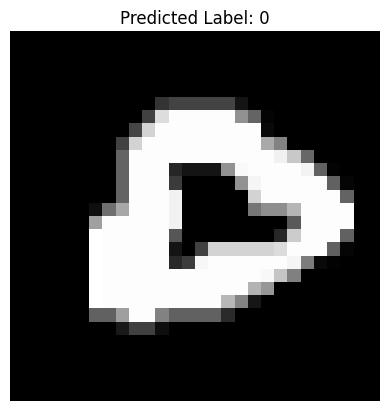

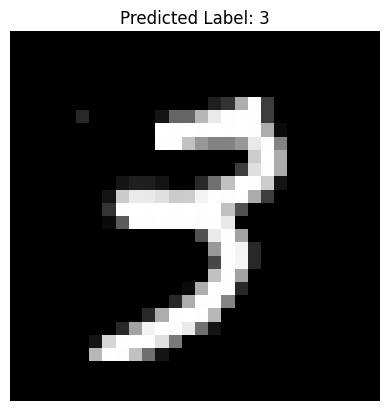

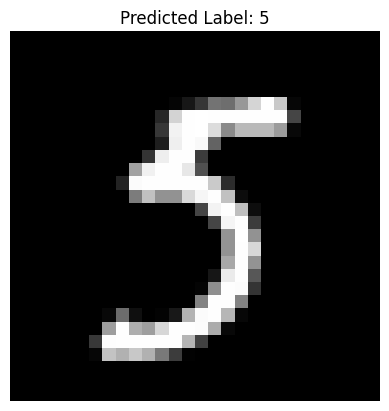

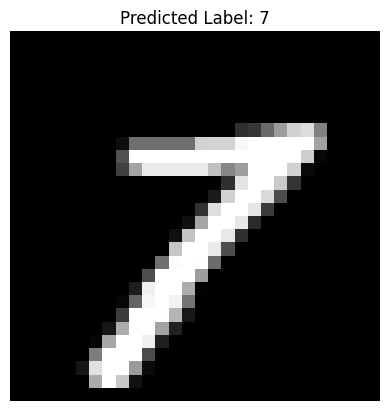

In [ ]:

class MLP_1(nn.Module):
    def __init__(self):
        super(MLP_1, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model_2 = MLP_1()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_2.parameters(), lr=0.001, momentum=0.9)

num_epochs = 10
for epoch in range(num_epochs):
    model_2.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model_2(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')


model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model_2(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()


print(f'Accuracy on test set: { correct / total}%')

model.eval()
predictions = []
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model_2(images)
        _, predicted = torch.max(outputs.data, 1)
        predictions.extend(predicted.numpy())
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(total)
print(correct)



import matplotlib.pyplot as plt
import numpy as np

def imshow(img, label):
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title('Predicted Label: {}'.format(label))
    plt.axis('off')
    plt.show()

for i in range(5):
    idx = np.random.randint(len(test_dataset))

    img, label = test_dataset[idx]


    output = model(img.unsqueeze(0))
    _, predicted = torch.max(output.data, 1)

    imshow(img, predicted.item())



iii) Adding dropout - 0.92685% (Reduced the Accuracy)

Epoch 1, Batch 100, Loss: 2.257572417259216
Epoch 1, Batch 200, Loss: 2.076458297967911
Epoch 1, Batch 300, Loss: 1.749909791946411
Epoch 1, Batch 400, Loss: 1.3687824845314025
Epoch 1, Batch 500, Loss: 1.0939003837108612
Epoch 1, Batch 600, Loss: 0.9273564821481705
Epoch 1, Batch 700, Loss: 0.8565280836820602
Epoch 1, Batch 800, Loss: 0.7851571470499039
Epoch 1, Batch 900, Loss: 0.7095764923095703
Epoch 2, Batch 100, Loss: 0.6667805060744285
Epoch 2, Batch 200, Loss: 0.6332784828543663
Epoch 2, Batch 300, Loss: 0.5970750257372857
Epoch 2, Batch 400, Loss: 0.5860609391331673
Epoch 2, Batch 500, Loss: 0.5503748124837875
Epoch 2, Batch 600, Loss: 0.5342456048727036
Epoch 2, Batch 700, Loss: 0.527583242058754
Epoch 2, Batch 800, Loss: 0.5110185679793358
Epoch 2, Batch 900, Loss: 0.5099594351649285
Epoch 3, Batch 100, Loss: 0.4647757661342621
Epoch 3, Batch 200, Loss: 0.4811186668276787
Epoch 3, Batch 300, Loss: 0.4510297554731369
Epoch 3, Batch 400, Loss: 0.44685986831784247
Epoch 3, Batc

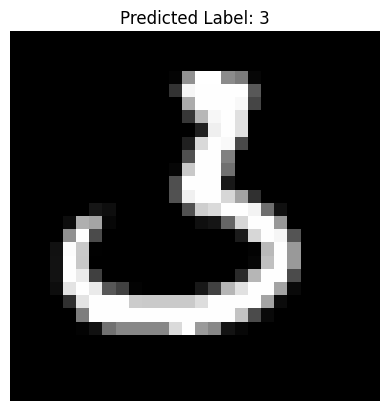

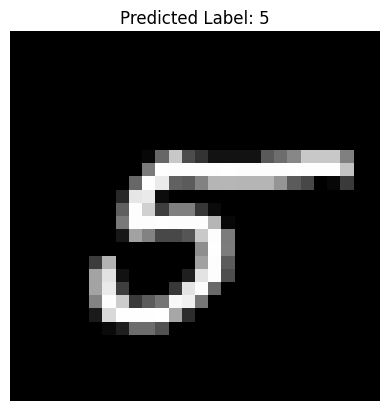

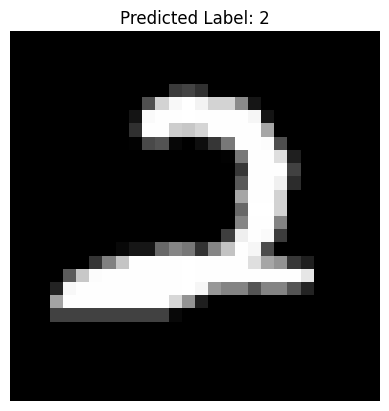

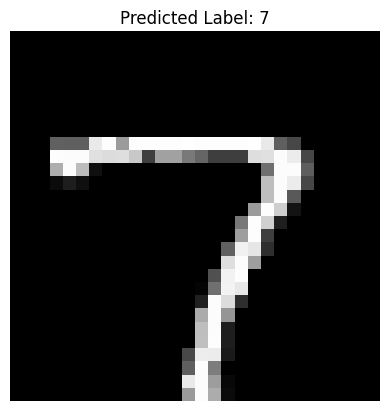

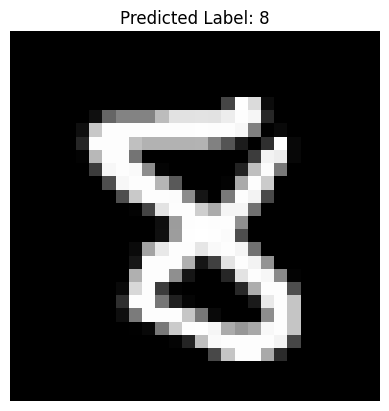

In [ ]:

import torch
import torch.nn as nn

class MLP_1(nn.Module):
    def __init__(self):
        super(MLP_1, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.dropout1 = nn.Dropout(p=0.5)  # Dropout layer with probability 0.5
        self.fc2 = nn.Linear(256, 256)
        self.dropout2 = nn.Dropout(p=0.5)  # Dropout layer with probability 0.5
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)  # Apply dropout
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)  # Apply dropout
        x = self.fc3(x)
        return x



model_2 = MLP_1()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_2.parameters(), lr=0.001, momentum=0.9)

num_epochs = 10
for epoch in range(num_epochs):
    model_2.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model_2(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')


model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model_2(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()


print(f'Accuracy on test set: { correct / total}%')



model.eval()
predictions = []
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model_2(images)
        _, predicted = torch.max(outputs.data, 1)
        predictions.extend(predicted.numpy())
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(total)
print(correct)



import matplotlib.pyplot as plt
import numpy as np


def imshow(img, label):
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title('Predicted Label: {}'.format(label))
    plt.axis('off')
    plt.show()

for i in range(5):
    idx = np.random.randint(len(test_dataset))

    img, label = test_dataset[idx]

    output = model(img.unsqueeze(0))
    _, predicted = torch.max(output.data, 1)

    imshow(img, predicted.item())



iv) Changing Activation to tanh and loss function to HingeLoss (MultiMarginLoss)  - 0.0.91735%% (Reduced the Accuracy)

Epoch 1, Batch 100, Loss: 0.6823825308680534
Epoch 1, Batch 200, Loss: 0.2801811407506466
Epoch 1, Batch 300, Loss: 0.16355208478868008
Epoch 1, Batch 400, Loss: 0.1306828011572361
Epoch 1, Batch 500, Loss: 0.1183841285854578
Epoch 1, Batch 600, Loss: 0.10178139351308346
Epoch 1, Batch 700, Loss: 0.09388097606599331
Epoch 1, Batch 800, Loss: 0.09243988178670406
Epoch 1, Batch 900, Loss: 0.08354354988783598
Epoch 2, Batch 100, Loss: 0.08025268189609051
Epoch 2, Batch 200, Loss: 0.07658777520060539
Epoch 2, Batch 300, Loss: 0.07121349543333054
Epoch 2, Batch 400, Loss: 0.06912486681714654
Epoch 2, Batch 500, Loss: 0.0672547398135066
Epoch 2, Batch 600, Loss: 0.0652252253703773
Epoch 2, Batch 700, Loss: 0.0616342356428504
Epoch 2, Batch 800, Loss: 0.06384508926421403
Epoch 2, Batch 900, Loss: 0.06296300709247589
Epoch 3, Batch 100, Loss: 0.05830714765936136
Epoch 3, Batch 200, Loss: 0.05783186677843332
Epoch 3, Batch 300, Loss: 0.057942712288349865
Epoch 3, Batch 400, Loss: 0.056391521636

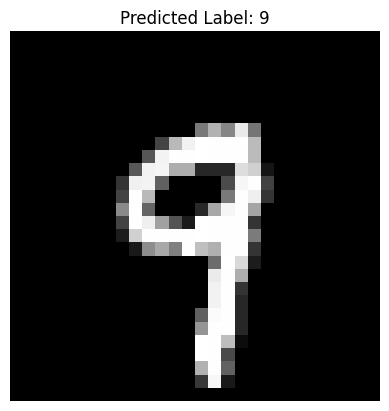

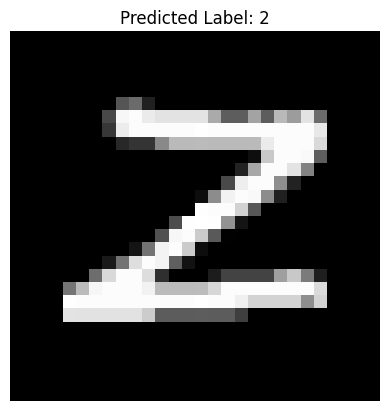

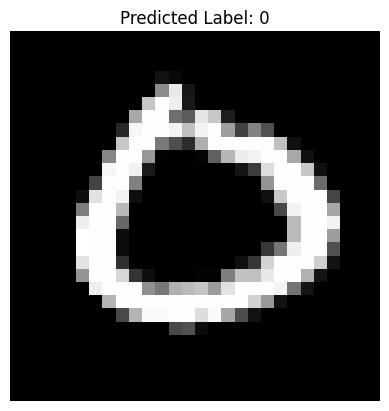

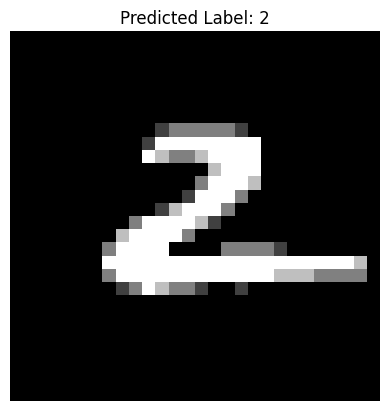

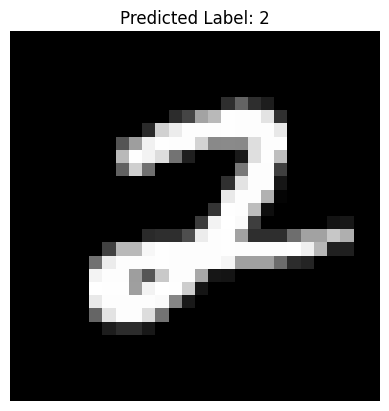

In [ ]:

import torch
import torch.nn as nn

class MLP_1(nn.Module):
    def __init__(self):
        super(MLP_1, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.tanh(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        x = self.fc3(x)
        return x


model_2 = MLP_1()


criterion = nn.MultiMarginLoss()
optimizer = optim.SGD(model_2.parameters(), lr=0.001, momentum=0.9)

num_epochs = 10
for epoch in range(num_epochs):
    model_2.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model_2(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')

model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model_2(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()


print(f'Accuracy on test set: { correct / total}%')


model.eval()
predictions = []
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model_2(images)
        _, predicted = torch.max(outputs.data, 1)
        predictions.extend(predicted.numpy())
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(total)
print(correct)



import matplotlib.pyplot as plt
import numpy as np

def imshow(img, label):
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title('Predicted Label: {}'.format(label))
    plt.axis('off')
    plt.show()

for i in range(5):

    idx = np.random.randint(len(test_dataset))
    img, label = test_dataset[idx]

    output = model(img.unsqueeze(0))
    _, predicted = torch.max(output.data, 1)

    imshow(img, predicted.item())



# `RESULTS AND DISCUSSIONS`

1) The Base Model provided an accuracy of 0.96%

2) When the No of nodes is increased to 256, the accuracy slightly improved to 0.97%

3) Changing the Optimizer from Adam to RMSprop(0.88%) and SGD with momentum of 0.9 (accuracy : 0.94%) reduced the performance accuracy from 0.97%

4)  Adding dropout reduced the accuracy to 0.93%

5)  Changing Activation to tanh and loss function to HingeLoss (MultiMarginLoss in PyTorch) - 0.0.91735%% doesn’t show any performance performance rather degraded it.




NOTE:

BACKPROPOGATION ADDED IN A SEPARATE PDF File.

GITHUB URL: